In [1]:
import pandas as pd
from plotnine import *

# Loading and Cleaning

This section loads up the csv file, drops the junk rows at the end, and removes the empty column.  Rows without a *Photo Date* field are removed, as well as those without any recorded animals.

The *Photo Date* and *Photo Time* fields are combined into one, which makes it easier to do the date and time math calculations needed for the window below. Finally, the *Number of Animals* column is converted to be integers, while the *Latitude* and *Longitude* columns are floating point numbers.

In [2]:
df = pd.read_csv("data/LaSelvaImages.curated.csv")

In [3]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df = df.drop(range(47720, 48273))
df = df.drop(columns=['Unnamed: 12'])

In [4]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df = df.dropna(subset=['Photo Date'])

In [5]:
# Should we drop these too??
df = df.dropna(subset=["Number of Animals"])

In [6]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df["Photo Date and Time"] = pd.to_datetime(df["Photo Date"] + " " + df["Photo Time"])

In [7]:
#df["Photo Date"] = pd.to_datetime(df["Photo Date"])
#df["Photo Time"] = pd.to_datetime(df["Photo Time"])

In [8]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
df = df.astype({'Number of Animals': 'int32'})
df = df.astype({'Latitude': 'float64'})
df = df.astype({'Longitude': 'float64'})

# Checking the Data

This is for making sure the cleaning worked above and we have the data in the right format. Also I plot the data to get a visual feel for what is in the file.

In [9]:
df.head(20)

,Sampling Unit Name,Latitude,Longitude,Sampling Period,Photo Date,Photo Time,Class,Order,Family,Genus,Species,Number of Animals,Photo Date and Time
1,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,12:58:20,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 12:58:20
2,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,12:58:22,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 12:58:22
3,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,12:58:23,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 12:58:23
4,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:05:53,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,2,2008-04-22 14:05:53
5,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:05:54,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,2,2008-04-22 14:05:54
6,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:08:21,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 14:08:21
7,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:08:22,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 14:08:22
8,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:23:24,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 14:23:24
9,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:23:25,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 14:23:25
10,CT-VB-1-1,10.42231,-84.0212,2007.01,4/22/2008,14:23:37,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 14:23:37


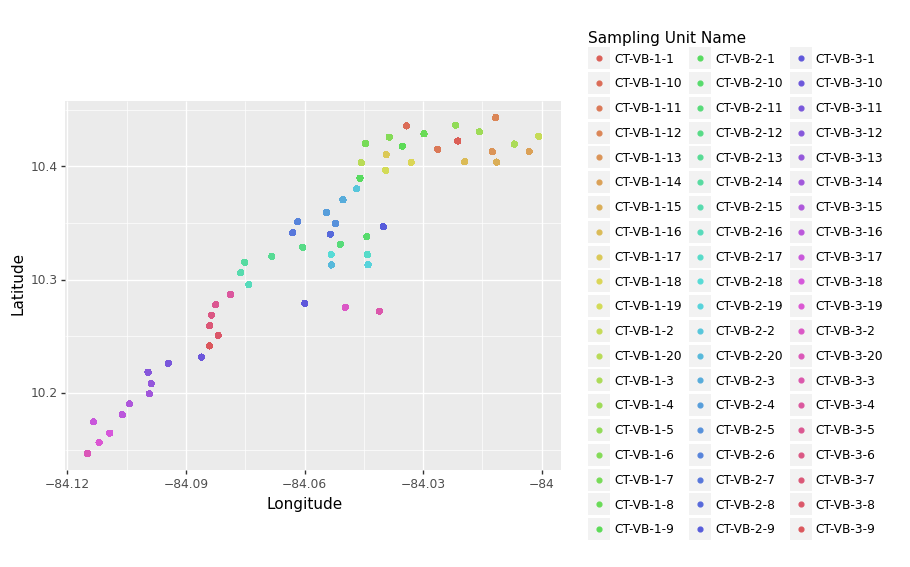

<ggplot: (8776053900008)>

In [10]:
ggplot(df, aes(x="Longitude", y="Latitude", color="Sampling Unit Name")) + geom_point()

# Applying the Window

We will read the rows one at a time, looking for the highest record of a given animal in a 30 minute window. The code will keep track of the record at the `start` of the window and the record in the window with the `best`, or highest, number of animals. These two start out being the same.

Three things will reset our window. First, if the time change is negative, this means we are moving to a new camera location. Second, if the next record is more than 30 minutes past our `start` record. Third, if a different species is identified by the camera. In all of these cases, the `best` is recorded, and our window is moved.

If the window has not moved, then we potentially reset the `best` to be the current row if more of the given type of animal is found.

At the end of reading the file, the last `best` from the last window is also recorded.

In [11]:
window = 30
first = True
best = None
start = None

df2 = pd.DataFrame(columns = df.columns)

for index, row in df.iterrows():
    if first:
        first = False
        best = row
        start = row
    else:
        delta = (row["Photo Date and Time"] - start["Photo Date and Time"]).total_seconds() / 60
        same = row["Genus"] == start["Genus"] and row["Species"] == start["Species"]
        if delta < 0 or delta > 30 or not same:
            df2 = df2.append(best)
            best = row
            start = row
        elif row["Number of Animals"] > best["Number of Animals"]:
            #print(row["Number of Animals"])
            best = row
df2 = df2.append(best)

# Saving the New File

In [12]:
df2

,Sampling Unit Name,Latitude,Longitude,Sampling Period,Photo Date,Photo Time,Class,Order,Family,Genus,Species,Number of Animals,Photo Date and Time
1,CT-VB-1-1,10.42231,-84.021200,2007.01,4/22/2008,12:58:20,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,1,2008-04-22 12:58:20
4,CT-VB-1-1,10.42231,-84.021200,2007.01,4/22/2008,14:05:53,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,2,2008-04-22 14:05:53
12,CT-VB-1-1,10.42231,-84.021200,2007.01,4/23/2008,6:21:57,AVES,TINAMIFORMES,TINAMIDAE,Tinamus,major,1,2008-04-23 06:21:57
17,CT-VB-1-1,10.42231,-84.021200,2007.01,4/23/2008,7:17:58,MAMMALIA,CETARTIODACTYLA,TAYASSUIDAE,Pecari,tajacu,5,2008-04-23 07:17:58
32,CT-VB-1-1,10.42231,-84.021200,2007.01,4/26/2008,17:31:50,MAMMALIA,RODENTIA,DASYPROCTIDAE,Dasyprocta,punctata,1,2008-04-26 17:31:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47639,CT-VB-3-9,10.24140,-84.084072,2011.01,4/18/2012,12:47:58,MAMMALIA,CETARTIODACTYLA,CERVIDAE,Mazama,temama,1,2012-04-18 12:47:58
47642,CT-VB-3-9,10.24140,-84.084072,2011.01,4/22/2012,13:23:10,MAMMALIA,CETARTIODACTYLA,CERVIDAE,Mazama,temama,1,2012-04-22 13:23:10
47655,CT-VB-3-9,10.24140,-84.084072,2013.01,3/30/2014,3:08:45,MAMMALIA,CETARTIODACTYLA,CERVIDAE,Mazama,temama,1,2014-03-30 03:08:45
47691,CT-VB-3-9,10.24140,-84.084072,2013.01,4/22/2014,19:30:02,MAMMALIA,CETARTIODACTYLA,CERVIDAE,Mazama,temama,1,2014-04-22 19:30:02


In [13]:
df2.to_csv("data/LaSelvaWindowed.csv")